# Investigation of Saudi Arabia COVID-19 Cases (Oct 2019 - Oct 2021)

Recently, there has been a huge interest in pandemic COVID-19 studies due that led to major global disruptions. In this investigation I will focus on Saudi Arabia COVID-19 Cases. 
 
## 1. Data Collection 
##### - Questions
- Are the different seasons and events (Summer, Winter, holidays, Eids...) affect the number of COVID-19 cases?
- Do the numbers of COVID-19 cases differ between big/main cities and small cities?
- What is the expected date of reaching zero cases?
- Is the COVID-19 cases indicators expected to rise again after returning back to school ( at 31 Oct 2021)?

##### - Type of Data
Time series data that obtained from The King Abdullah Petroleum Studies and Research Center in CSV format. The dataset include a sequence of data points (COVID-19 cases) indexed in time order from 1 Oct 2019 to 1 Oct 2021. It consists of 428346 row، related to 207 cities in Saudi Arabia. Additionally, it include fetures such:

- Number of Cases (Daily / Cumulative)
- Case Indicators (Active, Mortalities, Critical ...)
- Number of Cases
- Date 7 Day
- Events
- City & Region

##### - Sources
- https://datasource.kapsarc.org/explore/dataset/saudi-arabia-coronavirus-disease-covid-19-situation/export/?disjunctive.daily_cumulative&disjunctive.indicator&disjunctive.event&disjunctive.city_en&disjunctive.region_en

- https://covid19.moh.gov.sa/
 


## 2.  Data Preparation  

This section shows:
- Exploratory Data Analysis (EDA)
- Data Pre-processing
- Data Splitting
- Features Correaltions 

### a. Exploratory Data Analysis (EDA)

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [101]:
#Reading data
dataset = "dataset_covied19.csv"
df = pd.read_csv(dataset, error_bad_lines=False, sep=';')

In [102]:
df.head()

,Daily / Cumulative,Indicator,Date,Event,City,Region,Cases (person)
0,Cumulative,Cases,2020-11-05,NaN,Al Khubar,Eastern Region,7265
1,Cumulative,Cases,2020-11-05,NaN,Jeddah,Makkah Al Mukarramah,33808
2,Cumulative,Cases,2020-11-05,NaN,Ar Riyad,Ar Riyad,57841
3,Cumulative,Cases,2020-11-05,NaN,Ad Duwadimi,Ar Riyad,464
4,Cumulative,Cases,2020-10-28,NaN,Rabigh,Makkah Al Mukarramah,272


In [103]:
df.shape

(428346, 7)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428346 entries, 0 to 428345
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Daily / Cumulative  428346 non-null  object
 1   Indicator           428346 non-null  object
 2   Date                428346 non-null  object
 3   Event               1900 non-null    object
 4   City                428346 non-null  object
 5   Region              428346 non-null  object
 6   Cases (person)      428346 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 22.9+ MB


In [105]:

print('Tha dataset consists information about', df.City.nunique()-1, 'cities  arround Saudi Arabia for ', df.Region.nunique()-1, 'regions.')

Tha dataset consists information about 206 cities  arround Saudi Arabia for  13 regions.


In [106]:
df.Region.value_counts()

Ar Riyad                    70517
Eastern Region              60172
Makkah Al Mukarramah        54090
Aseer                       51448
Jazan                       39088
Al Qaseem                   31495
Al Madinah Al Munawwarah    22057
Al Bahah                    17973
Hail                        17157
Tabuk                       17153
Al Jawf                     14882
Najran                      14319
Northern Borders            12340
Total                        5655
Name: Region, dtype: int64

In [107]:
df.City.value_counts()

Total                   5655
Jeddah                  3857
Makkah Al Mukarramah    3788
Ar Riyad                3759
Ad Dammam               3622
                        ... 
Hadda                    154
Al Hadban                 93
Abu 'Urwah                72
Harad                     26
As Sulaymaniyyah          26
Name: City, Length: 207, dtype: int64

As can see, there are region and city called 'Total'

In [108]:
df.Indicator.value_counts()

Cases          145405
Recoveries     140960
Active          94333
Mortalities     45972
Tested           1158
Critical          518
Name: Indicator, dtype: int64

In [109]:
df.Event.value_counts()

Curfew lifted(all regions)                                                        939
Partial lifting of curfew in all cities except Makkah                             179
Jeddah areas lockdown - 24 h curfew                                               173
Makkah lockdown                                                                   136
Riyadh, Dammam , Tabuk , Dahran, Hafuf, Jeddah, Taif, Qatif , Khobar24h curfew    115
Jeddah lockdown                                                                    80
Makkah , Madinah 24 hours curfew                                                   79
Riyadh, Makkah and Madinah lockdown - curfew (6am - 3pm)                           70
Domestic flights suspension                                                        40
Gov / private suspension                                                           31
International flights suspension for 14 days                                       27
Umrah suspension                                      

In [110]:
df['Daily / Cumulative'].value_counts()

Cumulative    333140
Daily          95206
Name: Daily / Cumulative, dtype: int64

Feature variable (input): Indicator, Date, City, Region   
Target variable (Output): Cases


### b. Data Pre-processing

In [111]:
#(1) Conevrt 'Data' type
df['Date'] = pd.to_datetime(df['Date'])

In [112]:
#(2) Filling the NaN values in 'Event'
df1 = df.fillna({'Event':'No event'})
df1 

,Daily / Cumulative,Indicator,Date,Event,City,Region,Cases (person)
0,Cumulative,Cases,2020-11-05,No event,Al Khubar,Eastern Region,7265
1,Cumulative,Cases,2020-11-05,No event,Jeddah,Makkah Al Mukarramah,33808
2,Cumulative,Cases,2020-11-05,No event,Ar Riyad,Ar Riyad,57841
3,Cumulative,Cases,2020-11-05,No event,Ad Duwadimi,Ar Riyad,464
4,Cumulative,Cases,2020-10-28,No event,Rabigh,Makkah Al Mukarramah,272
...,...,...,...,...,...,...,...
428341,Cumulative,Active,2021-07-01,No event,Al Lith,Makkah Al Mukarramah,132
428342,Cumulative,Active,2021-07-01,No event,Badr,Al Madinah Al Munawwarah,76
428343,Cumulative,Active,2021-06-30,No event,Haql,Tabuk,7
428344,Cumulative,Active,2021-07-01,No event,Tabarjal,Al Jawf,8


In [113]:
#(3) Add 'Day' column
df1['Day'] = df1['Date'].dt.day_name() 
df1

,Daily / Cumulative,Indicator,Date,Event,City,Region,Cases (person),Day
0,Cumulative,Cases,2020-11-05,No event,Al Khubar,Eastern Region,7265,Thursday
1,Cumulative,Cases,2020-11-05,No event,Jeddah,Makkah Al Mukarramah,33808,Thursday
2,Cumulative,Cases,2020-11-05,No event,Ar Riyad,Ar Riyad,57841,Thursday
3,Cumulative,Cases,2020-11-05,No event,Ad Duwadimi,Ar Riyad,464,Thursday
4,Cumulative,Cases,2020-10-28,No event,Rabigh,Makkah Al Mukarramah,272,Wednesday
...,...,...,...,...,...,...,...,...
428341,Cumulative,Active,2021-07-01,No event,Al Lith,Makkah Al Mukarramah,132,Thursday
428342,Cumulative,Active,2021-07-01,No event,Badr,Al Madinah Al Munawwarah,76,Thursday
428343,Cumulative,Active,2021-06-30,No event,Haql,Tabuk,7,Wednesday
428344,Cumulative,Active,2021-07-01,No event,Tabarjal,Al Jawf,8,Thursday


In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428346 entries, 0 to 428345
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Daily / Cumulative  428346 non-null  object        
 1   Indicator           428346 non-null  object        
 2   Date                428346 non-null  datetime64[ns]
 3   Event               428346 non-null  object        
 4   City                428346 non-null  object        
 5   Region              428346 non-null  object        
 6   Cases (person)      428346 non-null  int64         
 7   Day                 428346 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 26.1+ MB


In [115]:
#(4)Rearrange Features
df1 = df1.rename(columns = {'Cases (person)':'Cases'}, inplace = False)
df1 = df1 [["Date","Day","Cases","City","Region","Indicator","Event","Daily / Cumulative"]]
df1

,Date,Day,Cases,City,Region,Indicator,Event,Daily / Cumulative
0,2020-11-05,Thursday,7265,Al Khubar,Eastern Region,Cases,No event,Cumulative
1,2020-11-05,Thursday,33808,Jeddah,Makkah Al Mukarramah,Cases,No event,Cumulative
2,2020-11-05,Thursday,57841,Ar Riyad,Ar Riyad,Cases,No event,Cumulative
3,2020-11-05,Thursday,464,Ad Duwadimi,Ar Riyad,Cases,No event,Cumulative
4,2020-10-28,Wednesday,272,Rabigh,Makkah Al Mukarramah,Cases,No event,Cumulative
...,...,...,...,...,...,...,...,...
428341,2021-07-01,Thursday,132,Al Lith,Makkah Al Mukarramah,Active,No event,Cumulative
428342,2021-07-01,Thursday,76,Badr,Al Madinah Al Munawwarah,Active,No event,Cumulative
428343,2021-06-30,Wednesday,7,Haql,Tabuk,Active,No event,Cumulative
428344,2021-07-01,Thursday,8,Tabarjal,Al Jawf,Active,No event,Cumulative


In [185]:
#(5) Extrat the 'Daily / Cumulative' cases
Daily_df = df1.loc[df1['Daily / Cumulative'] == 'Daily']
Cumulative_df = df1.loc[df1['Daily / Cumulative'] == 'Cumulative']

In [117]:
Daily_df.drop(Daily_df.columns[[7]], axis = 1) # drop un-needed column

,Date,Day,Cases,City,Region,Indicator,Event
4053,2021-07-31,Saturday,2,ʻUrayʻIrah,Eastern Region,Cases,No event
4054,2021-07-31,Saturday,4,ʻUqlat As Suqur,Al Qaseem,Cases,No event
4055,2021-07-31,Saturday,28,Makkah Al Mukarramah,Makkah Al Mukarramah,Cases,No event
4056,2021-07-31,Saturday,29,Najran,Najran,Cases,No event
4057,2021-07-31,Saturday,3,Hubuna,Najran,Cases,No event
...,...,...,...,...,...,...,...
423322,2021-05-15,Saturday,1,Al Madinah Al Munawwarah,Al Madinah Al Munawwarah,Mortalities,No event
423323,2021-05-16,Sunday,1,Khamis Mushayt,Aseer,Mortalities,No event
423324,2021-05-16,Sunday,1,Jeddah,Makkah Al Mukarramah,Mortalities,No event
423325,2021-05-16,Sunday,1,Al Qunfudhah,Makkah Al Mukarramah,Mortalities,No event


In [118]:
#(6) Handel rows that have "Total" value from 'Region' column
Total_reg = Daily_df[Daily_df.Region=='Total']
Total_reg.shape

(2274, 8)

In [119]:
Total_reg.head(10)

,Date,Day,Cases,City,Region,Indicator,Event,Daily / Cumulative
5002,2020-03-05,Thursday,3,Total,Total,Cases,No event,Daily
5003,2020-03-17,Tuesday,38,Total,Total,Cases,No event,Daily
5004,2020-03-21,Saturday,48,Total,Total,Cases,Domestic flights suspension,Daily
5005,2020-03-22,Sunday,119,Total,Total,Cases,No event,Daily
5006,2020-03-26,Thursday,112,Total,Total,Cases,"Riyadh, Makkah and Madinah lockdown - curfew (...",Daily
5007,2020-03-28,Saturday,99,Total,Total,Cases,No event,Daily
5008,2020-04-01,Wednesday,157,Total,Total,Cases,No event,Daily
5009,2020-04-04,Saturday,182,Total,Total,Cases,Jeddah areas lockdown - 24 h curfew,Daily
5010,2020-04-08,Wednesday,355,Total,Total,Cases,No event,Daily
5011,2020-04-10,Friday,382,Total,Total,Cases,No event,Daily


In [120]:
Total_reg.tail(10)

,Date,Day,Cases,City,Region,Indicator,Event,Daily / Cumulative
419421,2021-08-27,Friday,52889,Total,Total,Tested,No event,Daily
419422,2021-09-03,Friday,48141,Total,Total,Tested,No event,Daily
419423,2021-09-05,Sunday,47217,Total,Total,Tested,No event,Daily
419424,2021-09-07,Tuesday,49348,Total,Total,Tested,No event,Daily
419425,2021-09-10,Friday,43519,Total,Total,Tested,No event,Daily
419426,2021-09-11,Saturday,44227,Total,Total,Tested,No event,Daily
419427,2021-09-15,Wednesday,49548,Total,Total,Tested,No event,Daily
419428,2021-09-16,Thursday,53730,Total,Total,Tested,No event,Daily
419429,2021-09-18,Saturday,44013,Total,Total,Tested,No event,Daily
419430,2021-09-27,Monday,48516,Total,Total,Tested,No event,Daily


In [121]:
Daily_df.drop(Daily_df.loc[Daily_df['Region']=='Total'].index, inplace=True)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Drop 2274 rows that have 'total' & 'tested' values ( misleading rows). 

### c. Features Correlations 

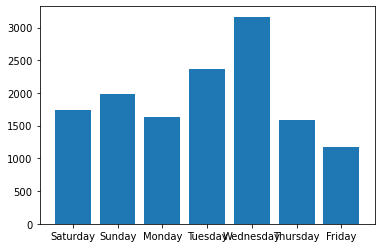

In [122]:
#PLOT Day & Cases

new_x = Daily_df.Day
new_y = Daily_df.Cases

plt.bar(new_x,new_y);

As shown above, Wednesday hav the maximum average cases. 


قد يعود تفسير هذا الامر الى كثرة الاجتماعات والمخالطة في نهاية الأسبوع، إذ أنه بحسب الدراسات الأعراض للمصاب لا تظهر إلا بعد أربعة أيام

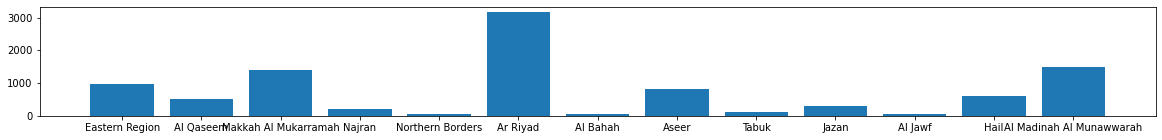

In [98]:
#PLOT average cases per region
plt.figure(figsize = [20,2])
x_reg = Daily_df.Region
y_reg = Daily_df.Cases

plt.bar(x_reg,y_reg);

As shown, Riyadh have the most maximum average cases during the two years, then Madinah and Makkah

<AxesSubplot:ylabel='City'>

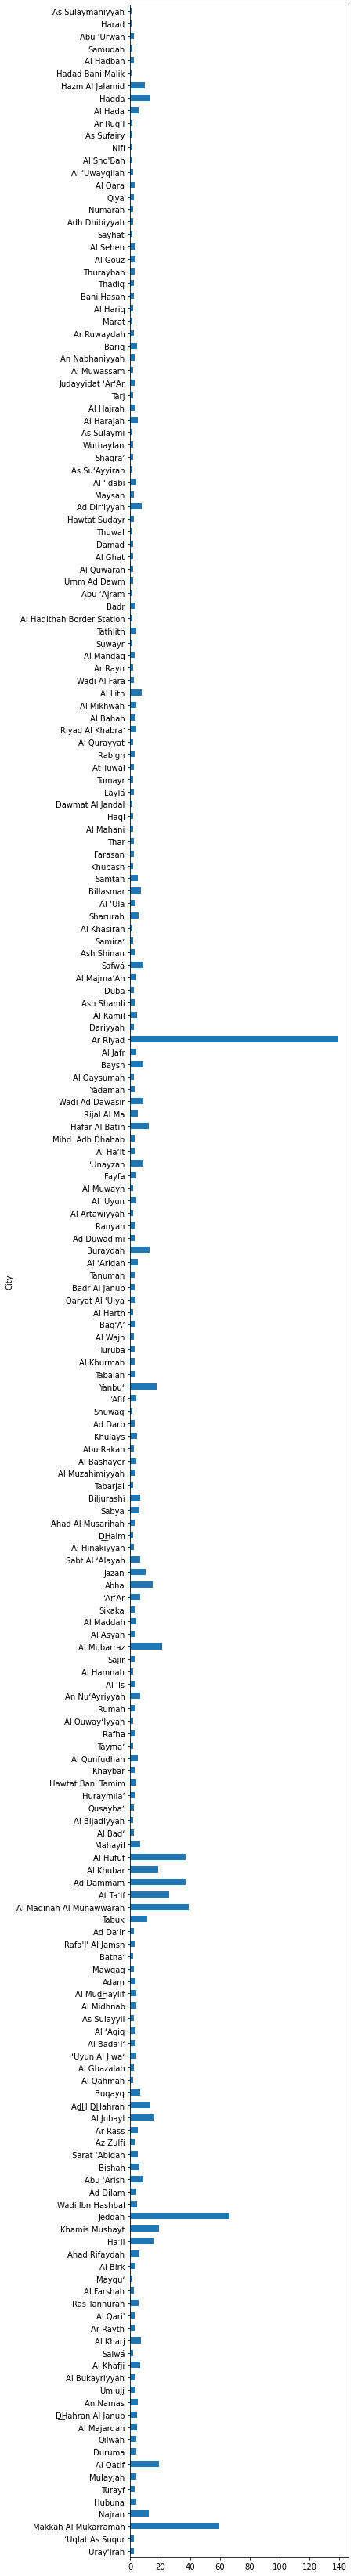

In [176]:
#PLOT average cases per city
cases_per_city = Daily_df.groupby(['City'], sort=False)['Cases'].mean()
#cases_per_city
plt.figure(figsize = [5,60])

cases_per_city.plot(kind = 'barh')
# ؟هل الحالات المرصودة متساوية لكل مدينة 

In [187]:
# PLOT dates & cases
Daily_df['month'] = Daily_df['Date'].dt.month
Daily_df


<ipython-input-187-4663d02371a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Daily_df['month'] = Daily_df['Date'].dt.month


,Date,Day,Cases,City,Region,Indicator,Event,Daily / Cumulative,month
4053,2021-07-31,Saturday,2,ʻUrayʻIrah,Eastern Region,Cases,No event,Daily,7
4054,2021-07-31,Saturday,4,ʻUqlat As Suqur,Al Qaseem,Cases,No event,Daily,7
4055,2021-07-31,Saturday,28,Makkah Al Mukarramah,Makkah Al Mukarramah,Cases,No event,Daily,7
4056,2021-07-31,Saturday,29,Najran,Najran,Cases,No event,Daily,7
4057,2021-07-31,Saturday,3,Hubuna,Najran,Cases,No event,Daily,7
...,...,...,...,...,...,...,...,...,...
423322,2021-05-15,Saturday,1,Al Madinah Al Munawwarah,Al Madinah Al Munawwarah,Mortalities,No event,Daily,5
423323,2021-05-16,Sunday,1,Khamis Mushayt,Aseer,Mortalities,No event,Daily,5
423324,2021-05-16,Sunday,1,Jeddah,Makkah Al Mukarramah,Mortalities,No event,Daily,5
423325,2021-05-16,Sunday,1,Al Qunfudhah,Makkah Al Mukarramah,Mortalities,No event,Daily,5


<AxesSubplot:xlabel='month'>

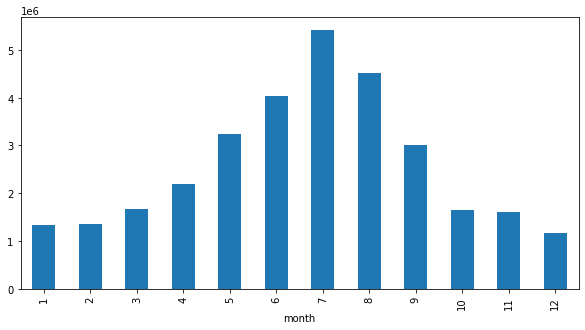

In [194]:
cases_per_city = Daily_df.groupby(['month'], sort=True)['Cases'].sum()
#cases_per_city
plt.figure(figsize = [10,5])

cases_per_city.plot(kind = 'bar')

In [ ]:
#Dealing with imbalance data (Critical in 'Indicator')


### d. Data Splitting 

- Training set
- Validation set
- Testing set

## 3. Train Model on Data

- Algorithm
- Type of Learning
- Overfitting / underfitting
- HypreParameter

## 4. Analysis and Evaluation 

- Evaluation Metrics 

## 5. Conclusion 